## **Libraries**

In [2]:
import os
import numpy as np
import cv2
from tensorflow.keras.datasets import mnist
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

---

# **Import Datasets**

> Mnist Dataset

In [ ]:
def load_mnist_dataset():

  # load data from tensorflow framework
  ((trainData, trainLabels), (testData, testLabels)) = mnist.load_data() 

  # Stacking train data and test data to form single array named data
  data = np.vstack([trainData, testData]) 

  # Vertical stacking labels of train and test set
  labels = np.hstack([trainLabels, testLabels]) 

  # return a 2-tuple of the MNIST data and labels
  return (data, labels)
  import cv2 
  print("hrlods djhds ")

>A-Z  Dataset (**CSV**)

In [ ]:
def load_az_dataset_csv(url):

  # List for storing data
  data = []
  
  # List for storing labels
  labels = []
  
  for row in open(url): #Openfile and start reading each row
    #Split the row at every comma
    row = row.split(",")
    
    #row[0] contains label
    label = int(row[0])
    
    #Other all collumns contains pixel values make a saperate array for that
    image = np.array([int(x) for x in row[1:]], dtype="uint8")
    
    #Reshaping image to 28 x 28 pixels
    image = image.reshape((28, 28))
    
    #append image to data
    data.append(image)
    
    #append label to labels
    labels.append(label)
    
  #Converting data to numpy array of type float32
  data = np.array(data, dtype='float32')
  
  #Converting labels to type int
  labels = np.array(labels, dtype="int")
  
  return (data, labels)

>Characters Dataset (**Images**)

In [ ]:
def load_dataset_img(url):
  
  # List for storing data
  data=[]

  # List for storing labels
  labels=[]

  # List of images in directory
  imgList = sorted(os.listdir(url))

  for i in range(36):  
    for j in range(55):
        # Processing the image
        img = cv2.imread(url+imgList.pop(0),0)
        img = cv2.resize(img,(28,28))
        # Invert the image for better processing
        img = cv2.bitwise_not(img)
        
        # Append the image in data list
        data.append(img)
        # Append image name in lable list
        labels.append(i)

  return (np.array(data),np.array(labels))

---

# Load Data

In [ ]:
# Number Data
Ndata,Nlabel = load_mnist_dataset()
# Alphabet Data
Adata,Alabel = load_az_dataset_csv("/content/drive/MyDrive/Character Recognition/A_Z Handwritten Data.csv")
# Characters Data
Cdata,Clabel = load_dataset_img("/content/drive/MyDrive/Character Recognition/Chars/")

11501568/11490434 [==============================] - 0s 0us/step


---

# Data Processing and Combining

In [ ]:
# the MNIST dataset occupies the labels 0-9, so let's add 10 to every A-Z label to ensure the A-Z characters are not incorrectly labeled 
Alabel += 10

#Combaining the data
data = np.vstack([Ndata,Adata,Cdata])
data = np.array(data, dtype="float32") #convert from unit8 to float32
labels = np.hstack([Nlabel,Alabel,Clabel])

# add a channel dimension to every image in the dataset and scale the
data = np.expand_dims(data, axis=-1)
# pixel intensities of the images from [0, 255] down to [0, 1]
data /= 255.0


---

# Creating and Compiling The Model

In [ ]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(filters=60,kernel_size=(5,5),input_shape=data.shape[1:],activation="relu"))
model.add(keras.layers.Conv2D(filters=60,kernel_size=(5,5),input_shape=data.shape[1:],activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(filters=30,kernel_size=(3,3),activation="relu"))
model.add(keras.layers.Conv2D(filters=30,kernel_size=(3,3),activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(500,activation="relu"))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(36,activation="softmax"))
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=["accuracy"]
)
model.fit(data,labels,epochs=10)

Epoch 1/10
13889/13889 [==============================] - 2699s 194ms/step - loss: 0.3272 - accuracy: 0.9049
Epoch 2/10
13889/13889 [==============================] - 2690s 194ms/step - loss: 0.1929 - accuracy: 0.9438
Epoch 3/10
13889/13889 [==============================] - 2718s 196ms/step - loss: 0.1744 - accuracy: 0.9491
Epoch 4/10
13889/13889 [==============================] - 2686s 193ms/step - loss: 0.1670 - accuracy: 0.9523
Epoch 5/10
13889/13889 [==============================] - 2667s 192ms/step - loss: 0.1664 - accuracy: 0.9529
Epoch 6/10
13889/13889 [==============================] - 2663s 192ms/step - loss: 0.1638 - accuracy: 0.9538
Epoch 7/10
13889/13889 [==============================] - 2709s 195ms/step - loss: 0.1620 - accuracy: 0.9544
Epoch 8/10
13889/13889 [==============================] - 2768s 199ms/step - loss: 0.1646 - accuracy: 0.9541
Epoch 9/10
 3778/13889 [=======>......................] - ETA: 35:00 - loss: 0.1638 - accuracy: 0.9538

---

# Some Wapper Functions

> Calculate the predicted value

In [3]:
chars = {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z'}
def predictChar(m,fimg):
  a = m.predict(fimg)
  n = np.argmax(a)
  p = a[0][n]*100/a.sum()
  return {"Character":chars[n],
          "Type":type(chars[n]),
          "Accuracy":p/100
          }

> Image Processing Function

In [4]:
def processIMG(path):
  img = cv2.imread(path,0)
  img = cv2.resize(img,(28,28))
  img = cv2.bitwise_not(img)
  img = np.array(img, dtype="float32")
  img = np.expand_dims(img, axis=-1)
  img /= 255.0
  return img

> Combine Both Wapper Funtions

In [5]:
def predictImg(m,path,show=0):
  img = processIMG(path)
  if(show == 1):
    plt.imshow(img.reshape(28,28),cmap='gray')
  return predictChar(m,img.reshape(1,28,28))

---
---

# Testing

---

{'Accuracy': 1.0, 'Character': 'A', 'Type': str}

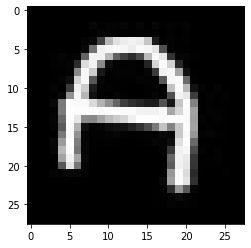

In [7]:
# Test the Model
# i1 = processIMG("/content/drive/MyDrive/Character Recognition/8.png")
# plt.matshow(i1.reshape(28,28))
# predictChar(model,i1.reshape(1,28,28))
predictImg(model,"/content/drive/MyDrive/Character Recognition/a.png",1)

---

In [ ]:
# Save the model
model.save("/content/drive/MyDrive/Character Recognition/modelccn_1")

In [6]:
# Load the model
model = keras.models.load_model("/content/drive/MyDrive/Character Recognition/modelccn")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

---

In [ ]:
import pickle

In [ ]:
# Pickel Dump
with open('/content/drive/MyDrive/Character Recognition/data.pkl', 'wb') as f:
  pickle.dump(data, f)
with open('/content/drive/MyDrive/Character Recognition/labels.pkl', 'wb') as f:
  pickle.dump(labels, f)

In [ ]:
#pickel Load
with open('/content/drive/MyDrive/Character Recognition/data.pkl', 'rb') as f:
  data = pickle.load(f)
with open('/content/drive/MyDrive/Character Recognition/labels.pkl', 'rb') as f:
  labels = pickle.load(f)

---